#### libraries

In [15]:
# device = cuda.get_current_device()
# device.reset()

import os

from numba import cuda 

import pandas as pd
import numpy as np
from numpy import savetxt
from numpy import genfromtxt
from matplotlib import *
import matplotlib.pyplot as plt
import h5py
import math
import scipy
from scipy import ndimage
import sklearn
import seaborn as sns

import tensorflow as tf
from tensorflow import *
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

import keras
# from keras.layers import Dense
# from keras.models import Sequential
# from keras.utils import to_categorical
from keras.callbacks import *
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split

import skimage
from skimage import * 
%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

### Observing Learning (Accuracy & Loss) Curves

Model to recognize handwritten digits dataset, a sample dataset that comes pre-loaded with scikit learn.

The digits dataset consist of 8x8 pixel handwritten digits from 0 to 9


array([[ 0.,  1.,  9., 16., 13.,  7.,  0.,  0.],
       [ 0.,  7., 14.,  4., 10., 12.,  0.,  0.],
       [ 0.,  6., 15.,  9., 16., 11.,  0.,  0.],
       [ 0.,  0.,  9., 11.,  7., 14.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 15.,  2.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 11.,  6.,  0.],
       [ 0.,  3., 13.,  8.,  5., 14.,  5.,  0.],
       [ 0.,  0.,  9., 14., 13., 10.,  1.,  0.]])


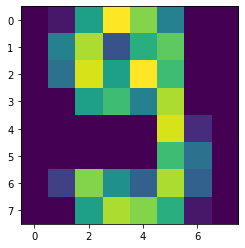

In [16]:
# data

from sklearn import datasets
digit_data = sklearn.datasets.load_digits()

X = digit_data['data']

y = digit_data['target']
y = np.reshape( y, (y.shape[0],1) )
y = keras.utils.to_categorical( y, dtype= 'float32' )

X_img = digit_data['images']

X_train, X_test, y_train, y_test = train_test_split( X, y,
                                                     test_size= 30./100, random_state= 42 )
# data visualization
indx = 39
img_digit = X_img[indx]
print(img_digit)

img_plot = plt.imshow(img_digit)

In [17]:
# model architecture
tf.keras.backend.clear_session()

kSeqModel_1 = keras.Sequential()
num_feature = X_train.shape[1]

kSeqModel_1.add( 
                    layer= Dense( 16, activation= 'relu', input_shape= (num_feature,) )
               )
kSeqModel_1.add(
                    layer= Dense( 10, activation= 'softmax' )
)

kSeqModel_1.compile( optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'] )
kSeqModel_1.predict( x= X_train )

print(kSeqModel_1.summary())
'''Predicting on training data inputs before training can help quickly check that the model works as expected.'''

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                1040      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 1,210
Trainable params: 1,210
Non-trainable params: 0
_________________________________________________________________
None


'Predicting on training data inputs before training can help quickly check that the model works as expected.'

In [18]:
# model fit
model_fit_history = kSeqModel_1.fit( x= X_train, y= y_train,
                                     verbose= 2, epochs= 20,
                                     validation_data= (X_test,y_test) )

initial_wt_learned = kSeqModel_1.get_weights()

Epoch 1/20
40/40 - 0s - loss: 8.3397 - accuracy: 0.0780 - val_loss: 4.1792 - val_accuracy: 0.1407
Epoch 2/20
40/40 - 0s - loss: 3.1741 - accuracy: 0.1790 - val_loss: 2.4414 - val_accuracy: 0.2296
Epoch 3/20
40/40 - 0s - loss: 2.1800 - accuracy: 0.2418 - val_loss: 1.9892 - val_accuracy: 0.2778
Epoch 4/20
40/40 - 0s - loss: 1.8955 - accuracy: 0.3071 - val_loss: 1.8034 - val_accuracy: 0.3241
Epoch 5/20
40/40 - 0s - loss: 1.7625 - accuracy: 0.3429 - val_loss: 1.7070 - val_accuracy: 0.3444
Epoch 6/20
40/40 - 0s - loss: 1.6796 - accuracy: 0.3715 - val_loss: 1.6323 - val_accuracy: 0.3537
Epoch 7/20
40/40 - 0s - loss: 1.6089 - accuracy: 0.3898 - val_loss: 1.5619 - val_accuracy: 0.3870
Epoch 8/20
40/40 - 0s - loss: 1.5349 - accuracy: 0.4224 - val_loss: 1.4680 - val_accuracy: 0.4519
Epoch 9/20
40/40 - 0s - loss: 1.4347 - accuracy: 0.4781 - val_loss: 1.3273 - val_accuracy: 0.5389
Epoch 10/20
40/40 - 0s - loss: 1.2814 - accuracy: 0.5434 - val_loss: 1.1737 - val_accuracy: 0.6037
Epoch 11/20
40/40 -

In [19]:
# helper function to plot accuracy

def plot_accuracy(model_history):    

    my_plot = plt.figure()
    ax = my_plot.add_subplot(111)

    plt.plot( model_history.history['accuracy'] )
    plt.plot( model_history.history['val_accuracy'] )

    ax.set_xlabel('Epoch');  ax.set_ylabel('Accuracy %')

    ax.spines['bottom'].set_color('red'); ax.spines['top'].set_color('red')
    ax.xaxis.label.set_color('red'); ax.yaxis.label.set_color('red')
    ax.tick_params(axis='x', colors='red'); ax.tick_params(axis='y', colors='red')


    plt.title( 'Model Accuracy over Training and Validation dataset' , color ='blue' )

    plt.legend( ['Train dataset', 'Validation dataset'], loc= 'upper right' )
    plt.show()
    
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

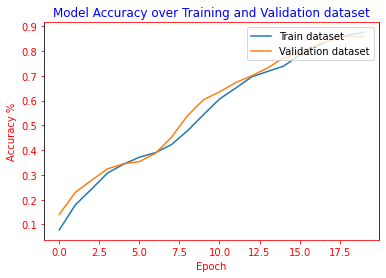

In [20]:
plot_accuracy( model_fit_history  )

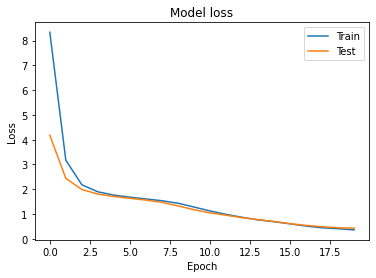

In [21]:
plot_loss( model_fit_history.history['loss'],
           model_fit_history.history['val_loss'] )

In [22]:
# Comparing model learning process using fractional data


train_Accuracy_list = []; test_Accuracy_list = []
training_sizes = np.array( [125,502,879,1255] )

for frac_size in training_sizes:
    # split the train data
    X_train_frac, _, y_train_frac, _ = train_test_split( X_train, y_train, train_size= frac_size )
    
    # set to-be-learning model's weigths to already learned weight
    kSeqModel_1.set_weights(initial_wt_learned)
    
    # fot model using fraction data
    kSeqModel_1.fit( x= X_train_frac, y= y_train_frac,
                     epochs= 1000, verbose= 0,
                     callbacks= [ EarlyStopping(monitor= 'loss', patience= 50) ]
                   )
    # get the accuracy for fractional data
    train_Accuracy = kSeqModel_1.evaluate( x= X_train_frac, y= y_train_frac, verbose= 2 )[1]
    train_Accuracy_list.append(train_Accuracy)
    
    # accuracy for test data
    test_Accuracy = kSeqModel_1.evaluate(X_test, y_test, verbose= 2)[1]
    test_Accuracy_list.append(test_Accuracy)
    
    print('Done with the size: ', frac_size); print('\n------------------------------------------------------')
    

4/4 - 0s - loss: 4.4908e-04 - accuracy: 1.0000
17/17 - 0s - loss: 0.6298 - accuracy: 0.8907
Done with the size:  125

------------------------------------------------------
16/16 - 0s - loss: 4.2887e-07 - accuracy: 1.0000
17/17 - 0s - loss: 0.2331 - accuracy: 0.9556
Done with the size:  502

------------------------------------------------------
28/28 - 0s - loss: 1.8987e-09 - accuracy: 1.0000
17/17 - 0s - loss: 0.3523 - accuracy: 0.9556
Done with the size:  879

------------------------------------------------------
40/40 - 0s - loss: 9.7451e-07 - accuracy: 1.0000
17/17 - 0s - loss: 0.3845 - accuracy: 0.9704
Done with the size:  1255

------------------------------------------------------


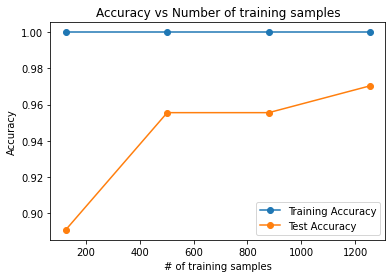

In [23]:
# helper function

def plot_results(train_accs,test_accs):
  plt.plot(training_sizes, train_accs, 'o-', label="Training Accuracy")
  plt.plot(training_sizes, test_accs, 'o-', label="Test Accuracy")
  plt.title('Accuracy vs Number of training samples')
  plt.xlabel('# of training samples')
  plt.ylabel('Accuracy')
  plt.legend( loc= "best" )
  plt.show()

plot_results( train_Accuracy_list, test_Accuracy_list  )